# Tarea BDA05

# David Carlón Cembranos

# Preparación
El objetivo de esta tarea es realizar un análisis exploratorio y entrenar y evaluar un modelo con [Spark MLlib](https://spark.apache.org/mllib/) similar a lo que se hizo en la guía didáctica de la unidad.

Elige un `dataset` que no haya sido utilizado anteriormente en el curso ni por ningún otro compañero y publica una respuesta en el foro indicando la URL dónde has descargado el `dataset`, la temática y el objetivo que se persigue con el algoritmo de apredizaje automático. No crees un hilo nuevo para esto. Añade una respuesta en el hilo creado al efecto.

El `dataset` debe tener más de 10MB de tamaño pero no ser mucho mayor. Puedes usar cualquier `dataset` públicamente y libremente accesible (por ejemplo en Kaggle o en GitHub).

# Descripción


Cargamos el csv desde Archivo/Cargar Datos al DBFS 
 

In [ ]:
# Mostrar archivo en DBFS
dataPath = 'dbfs:/FileStore/tables/data_FIFA19.csv'
display(dbutils.fs.ls(dataPath))


path,name,size,modificationTime
dbfs:/FileStore/tables/data_FIFA19.csv,data_FIFA19.csv,9140113,1710865489000


In [ ]:

# Creacion del dataframe con spark
from pyspark.sql import SparkSession
fifadf = spark.read.option("header","true").option("inferSchema", "true").csv('/FileStore/tables/data_FIFA19.csv')
fifadf.count()

Out[2]: 18207

Es un dataframe con 18207 filas y 89 columnas.

Por limitaciones de rendimiento y por hacer un poco  mas sencillo el dataframe vamos a trabajar con un subconjunto de 2000 registros.

In [ ]:
fifadf = fifadf.limit(2000)
fifadf.count()

Out[5]: 2000

Vemos el tipo de variables.

In [ ]:
fifadf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Preferred Foot: string (nullable = true)
 |-- International Reputation: integer (nullable = true)
 |-- Weak Foot: integer (nullable = true)
 |-- Skill Moves: integer (nullable = true)
 |-- Work Rate: string (nullable = true)
 |-- Body Type: string (nullable = true)
 |-- Real Face: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Jersey Number: integer (nullable = true)
 |-- Joined: string (nullable = true)
 |-- Loaned From: string (nu

Como se puede ver, tiene muchas columnas de diferentes tipos de datos. En este caso, determino que lo que voy a intentar predecir con el modelo es el nivel total del jugador (overall), que es la puntuacion media de cada jugador y la mas representativa.

In [4]:
fifadf

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


# Análisis exploratorio de datos, elección del modelo y preparación de los datos


In [ ]:
#Top 10 mejores jugadores
from pyspark.sql import functions as f
display(fifadf.select(f.col('Name'), f.col('Overall')).sort(f.desc('Overall')).limit(10))

Name,Overall
L. Messi,94
Cristiano Ronaldo,94
Neymar Jr,92
De Gea,91
K. De Bruyne,91
E. Hazard,91
L. Modrić,91
L. Suárez,91
Sergio Ramos,91
J. Oblak,90


Databricks visualization. Run in Databricks to view.

In [ ]:
#Top 10 peores jugadores
display(fifadf.select(f.col('Name'), f.col('Overall')).sort(f.asc('Overall')).limit(10))

Name,Overall
Felipe,75
L. Lerager,75
S. Fofana,75
Pablo Santos,75
J. Svensson,75
E. Roco,75
F. Midtsjø,75
Francis,75
Ivi,75
Unai Núñez,75


Databricks visualization. Run in Databricks to view.

In [ ]:
# Mostramos la media de los 10 mejores clubs. 

# Agrupar por 'Club' y calcular la media de 'Overall'
df_mean_overall = fifadf.groupBy('Club').agg(avg('Overall').alias('MeanOverall'))

# Ordenar por 'MeanOverall' descendente y limitar a 10 filas
df_mean_overall_sorted = df_mean_overall.sort(desc('MeanOverall')).limit(10)

# Mostrar el resultado
display(df_mean_overall_sorted)

Club,MeanOverall
Real Madrid,84.54545454545455
FC Barcelona,84.47619047619048
Manchester City,84.14285714285714
Juventus,84.13636363636364
FC Bayern München,83.95
Atlético Madrid,83.45
Paris Saint-Germain,82.57142857142857
Dalian YiFang FC,82.5
Vissel Kobe,82.0
Tottenham Hotspur,81.95454545454545


Databricks visualization. Run in Databricks to view.

In [14]:
# Mostramos Overall dependiendo del Value.
display(fifadf.select(f.col('Value'), f.col('Overall')))



,Value,Overall
0,€110.5M,94
1,€77M,94
2,€118.5M,92
3,€72M,91
4,€102M,91
...,...,...
18202,€60K,47
18203,€60K,47
18204,€60K,47
18205,€60K,47


In [13]:
display(fifadf.select(f.col('Crossing'), f.col('Overall')))


,Crossing,Overall
0,84.0,94
1,84.0,94
2,79.0,92
3,17.0,91
4,93.0,91
...,...,...
18202,34.0,47
18203,23.0,47
18204,25.0,47
18205,44.0,47


In [9]:
display(fifadf.select(f.col('ShortPassing'), f.col('Overall')))


,ShortPassing,Overall
0,90.0,94
1,81.0,94
2,84.0,92
3,50.0,91
4,92.0,91
...,...,...
18202,49.0,47
18203,43.0,47
18204,38.0,47
18205,42.0,47


In [10]:
display(fifadf.select(f.col('Dribbling'), f.col('Overall')))


,Dribbling,Overall
0,97.0,94
1,88.0,94
2,96.0,92
3,18.0,91
4,86.0,91
...,...,...
18202,42.0,47
18203,39.0,47
18204,45.0,47
18205,51.0,47


In [11]:
display(fifadf.select(f.col('Overall'),f.col('Dribbling'),f.col('SprintSpeed'),f.col('BallControl')))


,Overall,Dribbling,SprintSpeed,BallControl
0,94,97.0,86.0,96.0
1,94,88.0,91.0,94.0
2,92,96.0,90.0,95.0
3,91,18.0,58.0,42.0
4,91,86.0,76.0,91.0
...,...,...,...,...
18202,47,42.0,57.0,43.0
18203,47,39.0,39.0,40.0
18204,47,45.0,69.0,44.0
18205,47,51.0,60.0,52.0


Tras un primer vistazo de los datos, como hay demasiadas columnas, y lo que quiero es predecir el nivel Total del jugador (Overall) en base a caracteristicas como
Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,etc

Elimino muchas columnas, y me quedo con las que son de tipo integer menos el nombre, para hacer mas sencillo el modelo.

In [ ]:
fifadf = fifadf.drop("LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW","LAM", "RAM", "LM", "CM", "RCM", "RM" "LWB", "LDM", "RDM","RWB", "LB", "LCB", "CB", "RCB", "RB" ,"CAM",
            "LCM","RM","LWB","CDM") 

fifadf = fifadf.drop('_c0', 'ID','Photo','Nationality','Flag', 'Club','Club Logo', 'Jersey Number','Joined','Special','Loaned From', 'Real Face',
              'Body Type', 'Release Clause', 'Weight','Height','Contract Valid Until','Wage','Value','Club',
               'Age', 'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position')


Comprobamos que todas son numericas menos el nombre,en este caso no vamos a hacer normalizacion de valores puesto que todas las caracteristicas esta en la misma escala.

In [ ]:
fifadf.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- International Reputation: integer (nullable = true)
 |-- Crossing: integer (nullable = true)
 |-- Finishing: integer (nullable = true)
 |-- HeadingAccuracy: integer (nullable = true)
 |-- ShortPassing: integer (nullable = true)
 |-- Volleys: integer (nullable = true)
 |-- Dribbling: integer (nullable = true)
 |-- Curve: integer (nullable = true)
 |-- FKAccuracy: integer (nullable = true)
 |-- LongPassing: integer (nullable = true)
 |-- BallControl: integer (nullable = true)
 |-- Acceleration: integer (nullable = true)
 |-- SprintSpeed: integer (nullable = true)
 |-- Agility: integer (nullable = true)
 |-- Reactions: integer (nullable = true)
 |-- Balance: integer (nullable = true)
 |-- ShotPower: integer (nullable = true)
 |-- Jumping: integer (nullable = true)
 |-- Stamina: integer (nullable = true)
 |-- Strength: integer (nullable = true)
 |-- LongShots: int

Comprobamos si hay algun valor nulo

In [ ]:
import pyspark.sql.functions as F
display(fifadf.select([F.count(F.when(F.isnan(c), c)).alias(c) for c in fifadf.columns]))

Name,Overall,Potential,International Reputation,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Databricks visualization. Run in Databricks to view.

In [ ]:
display(fifadf.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in fifadf.columns]))

Name,Overall,Potential,International Reputation,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Aunque no hay ninguno aun asi borramos los null y los nan

In [ ]:
fifadf = fifadf.na.drop()

Tras un primer intento de analisis, y aun sabiendo que cosas como el club y el valor pueden estar realcionadas con el overall. Decido eliminarlas y centrarme en los valores de skills que son las anteriormente comentadas a continuacion, mostrare como queda el dataframe. Mostrare tambien usando Matplotlib(Tengo un poco mas de conocimiento de la libreria, sabiendo que esta libreria si el dataset fuera muy grande daria problemas de rendimiento como explicas en el video de la guia) la correlacion entre las variables en una matriz para decidir cuales incluyo en el modelo, aunque lo mas probable es que use todas. 

In [ ]:
display(fifadf.describe())

summary,Name,Overall,Potential,International Reputation,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
mean,null,78.197,80.3035,1.7745,60.873,56.314,60.7305,70.7685,54.8175,67.04,60.0245,54.059,64.806,70.6295,68.9525,69.1955,69.2445,75.361,66.5645,67.589,69.654,70.8445,70.503,59.9075,65.9605,56.594,61.281,66.2475,57.4205,72.7305,56.0375,55.99,52.8085,17.258,16.9595,16.618,17.0675,17.3305
stddev,null,3.285968623541195,4.114103872696613,0.8117753627819774,19.967353820907384,21.440668252821865,19.36531377072727,14.265541019543935,20.53752878986167,19.90073917496167,20.51939137648167,20.066510693832974,14.65017671698602,17.292765817671047,14.115199721633081,13.5241906085284,13.977532166041533,5.088872892267699,14.777889997099825,17.450941140045632,11.393954322251291,14.781054073704109,11.455287111260047,20.723650223580165,17.134548027831357,22.828835753733358,21.725561880409664,13.619911701159204,17.279061396133912,8.040658918765557,22.236148877637383,24.47652855747956,24.88070241022575,20.593505826864956,19.722178934411897,18.601077281652778,20.14052541847074,20.937608781347034
min,A. Adomah,75,75,1,7,5,7,11,7,7,8,7,11,9,22,26,19,55,20,12,29,18,27,6,11,7,4,11,9,20,7,7,8,1,1,1,1,1
max,Óliver Torres,94,95,5,93,95,94,93,90,97,94,94,93,96,97,96,96,96,96,95,95,96,95,94,95,92,95,94,92,96,94,93,91,90,92,91,90,94


In [ ]:
#Calculamos la correlacion entre variables
import six
for i in fifadf.columns:
    if not( isinstance(fifadf.select(i).take(1)[0][0], six.string_types)):
        print( i,"Su correlación con Overall es:", fifadf.stat.corr('Overall',i))

Overall Su correlación con Overall es: 1.0
Potential Su correlación con Overall es: 0.7326945574179919
International Reputation Su correlación con Overall es: 0.6616033096512337
Crossing Su correlación con Overall es: 0.07757050796036291
Finishing Su correlación con Overall es: 0.11230973151264384
HeadingAccuracy Su correlación con Overall es: 0.0366040631907074
ShortPassing Su correlación con Overall es: 0.14941739046826444
Volleys Su correlación con Overall es: 0.13423562797585123
Dribbling Su correlación con Overall es: 0.09127254653585234
Curve Su correlación con Overall es: 0.10480673424563562
FKAccuracy Su correlación con Overall es: 0.1161502490179511
LongPassing Su correlación con Overall es: 0.14754396101202594
BallControl Su correlación con Overall es: 0.11768605993122822
Acceleration Su correlación con Overall es: 0.09247105427677216
SprintSpeed Su correlación con Overall es: 0.09464633884482052
Agility Su correlación con Overall es: 0.09350110573286238
Reactions Su correlac

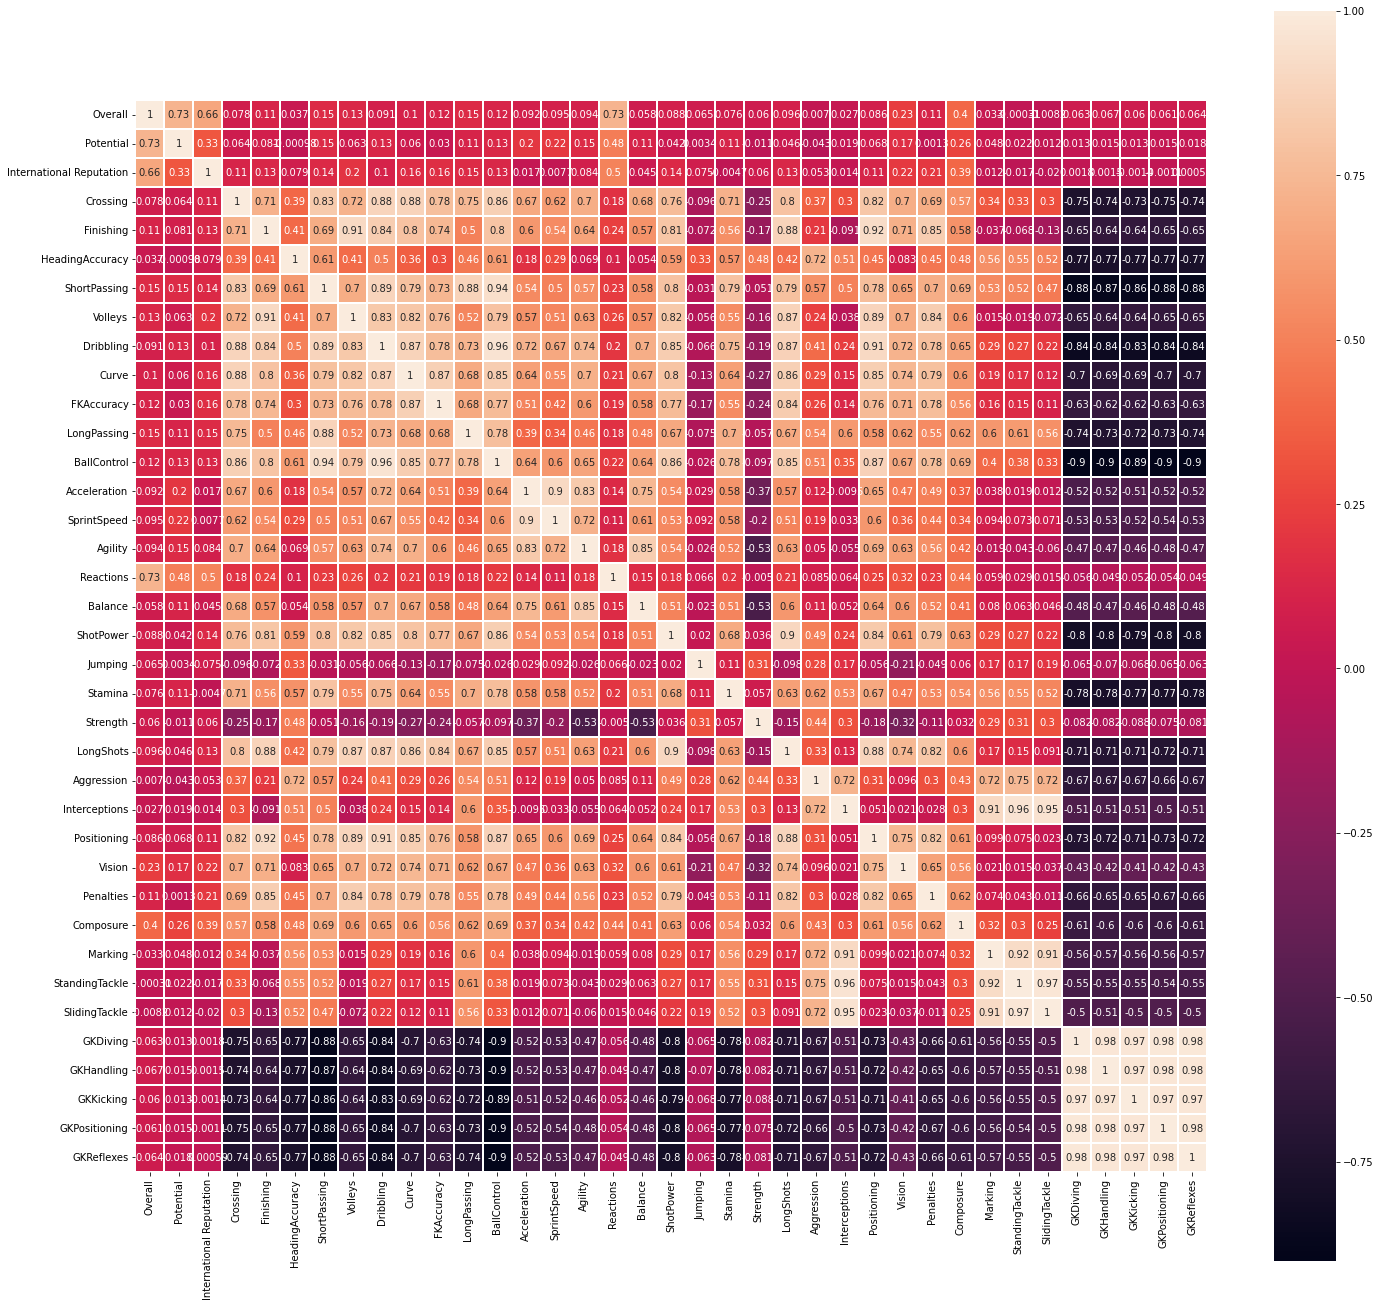

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualización de la correlación de las variables mediante la matriz de correlación

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,23))
sns.heatmap(fifadf.select([c for c in fifadf]).toPandas().corr(),linewidths=0.2,vmax=1.0, square=True, linecolor="white", annot=True)
display(plt.show())
plt.gcf().clear()


Como se puede ver, Potential, International Reputation, Reactions y Composure son las que mas relacion tienen con overall. Las habilidades de portero que son las variables que empiezan por GK son las menos ralcionadas con overall.

Por el tipo de dato voy a usar una regresion lineal para el modelo.

# Entrenamiento


In [ ]:
#separamos el conjunto de datos en entrentamiento y test 70% y 30%
train, test = fifadf.randomSplit ([0.7, 0.3]) 
print ("Recuento de conjunto de datos de entrenamiento:" + str (train.count())) 
print ("Recuento de conjunto de datos de prueba: "+ str (test.count()))

Recuento de conjunto de datos de entrenamiento:1451
Recuento de conjunto de datos de prueba: 549


In [ ]:
# A los modelos hay que pasarle una variable label, que indica el valor queremos predecir y
# un vector con todas las variables predictoras (features)
from pyspark.ml.feature import VectorAssembler
t = VectorAssembler(inputCols=['Potential', 'Crossing', 'Finishing', 'HeadingAccuracy','ShortPassing','Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','Acceleration','SprintSpeed','Agility', 'Reactions','Balance', 'ShotPower', 'Jumping',
            'Stamina', 'Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
            'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'], outputCol = 'features')
training = t.transform(train).withColumn('label',train.Overall)

t = VectorAssembler(inputCols=['Potential', 'Crossing', 'Finishing', 'HeadingAccuracy','ShortPassing','Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','Acceleration','SprintSpeed','Agility', 'Reactions','Balance', 'ShotPower', 'Jumping',
            'Stamina', 'Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
            'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'], outputCol = 'features')
testing = t.transform(test).withColumn('label',test.Overall)

In [ ]:
# Construir y ajustar el modelo al conjunto de datos de entrenamiento
#
from pyspark.ml.regression import LinearRegression
# Construimos el modelo
lr = LinearRegression(maxIter=100)
# Lo entrenamos sobre el conjunto de datos de entrenamiento usando la función fit
# En este caso el conjunto de entrenamiento consideramos toda la muestra del Dataframe
model = lr.fit(training)

In [ ]:
#probamos el modelo con los casos de Test
df_results = model.transform(testing)

In [ ]:
# Usamos la función summary del modelo de regresión que nos va a permitir obtener 
# distintas métricas para ver la calidad de nuestro módelo.
#
modelsummary = model.summary
#
# Entre las métricas podemos analizar:
#
# El coeficiente de determinación, que también se conoce como R cuadrado. 
# Es una manera estándar de medir cuánto se adapta el modelo a los datos.
# Se puede interpretar como la proporción de la variación que explica el modelo. 
# Una mayor proporción es mejor en este caso, donde 1 indica un ajuste perfecto.
#
print(f'Coeficiente de determinación- R cuadrado: {modelsummary.r2}')


Coeficiente de determinación- R cuadrado: 0.7834522763160036


In [ ]:
display(df_results.select("name","prediction","Overall"))

name,prediction,Overall
A. Barnes,76.57078310300969,76
A. Begović,79.07707308216433,79
A. Blake,76.89850820266204,75
A. Correa,82.33478785731559,81
A. Cragno,76.43718976841063,78
A. Diaby,75.46247542120267,75
A. Donnarumma,72.86638614111845,75
A. Doucouré,79.54065362118595,81
A. Dzyuba,78.01087738574967,78
A. Fernández,79.41961740468048,80


Databricks visualization. Run in Databricks to view.

# Conclusiones


Mis conclusiones, con un 78% de coeficiente, el modelo no es muy preciso, pero mirando la tabla con las predicciones, la mayoria de predicciones se acercan bastante al overall original. Eso bajo mi punto de visto y el uso que se le daria a este modelo, que seria el de asignar un nivel total a cada jugador dependiendo de sus estadisticas. Creo que se podria usar a sabiendas que se podria afinar o probar con otros algoritmos para mejorar.